# Part I: Webscraping, wordcloud, and wordcounts

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt

## Webscrape and compile the data into a dataframe

In [2]:
# Website to scrape from
url = 'https://www.cbinsights.com/research/startup-failure-post-mortem/'
# Establish connection to website
response = requests.get(url)
# <Response [200]> means the connection was established
print response
# Parse HTML and save to BeautifulSoup object
only_p_tags = SoupStrainer("p")
soup2 = BeautifulSoup(response.text, "html.parser", parse_only=only_p_tags)
#print soup2.prettify()

<Response [200]>


In [3]:
#initiate variables
Company = None
URL = None
Description = ""
# l is list of dictionaries. Each dictionary corresponds to a row in the dataframe
l = []
#Add dictionaries to the list l. Each dictionary will be a row in the df
for e in soup2.findAll('p')[14:]:
    if 'Title:' in e.get_text():
        l.append({'Company': Company, 'URL': URL, 'Description': Description})
        Company, URL, Description = None, None, ""
        print '\n'
        print e.get_text()
        print(e.a.get('href'))
        URL = e.a.get('href')
    elif 'Product:' in e.get_text() or 'Company:' in e.get_text():
        print e.get_text().split(':')[-1].strip()
        Company = e.get_text().split(':')[-1].strip()
    else:
        print e.get_text()
        Description += e.get_text()

df = pd.DataFrame(l)  
df = df[['Company', 'URL', 'Description']].iloc[1:]



Title: Robotics startup Anki shuts down after burning through almost $200 million
https://venturebeat.com/2019/04/29/robotics-startup-anki-shuts-down-after-burning-through-almost-200-million/
Anki
Consumer AI robotics company Anki had raised over $200M from prominent investors but the company wasn’t able to stay afloat after reportedly failing to attract a new round of investment or an acquirer. Anki posted a statement on its website:
It is with a heavy heart to inform you that Anki has ceased product development and we are no longer manufacturing robots. To our partners and customers, thank you for all your support and joining us on this journey to bring robotics and AI out of research labs and into your homes.


Title: Space firm founded by billionaire Paul Allen closing operations
https://www.reuters.com/article/us-space-exploration-stratolaunch-exclus/exclusive-space-firm-founded-by-billionaire-paul-allen-closing-operations-sources-idUSKCN1T12FD
Stratolaunch
Stratolaunch was foun


Title: Lights out
https://www.light.house/
Lighthouse AI
Lighthouse AI’s CEO Alex Teichman shared a farewell message on the company’s website:
I am incredibly proud of the groundbreaking work the Lighthouse team accomplished – delivering useful and accessible intelligence for our homes via advanced AI and 3D sensing. Unfortunately, we did not achieve the commercial success we were looking for and will be shutting down operations in the near future.


Title: Thank you for making a place for us at your table
https://www.munchery.com/
Munchery
As a player in the increasingly crowded food delivery space, Munchery writes:
Today, with heavy heart, we’re announcing that Munchery is closing its doors and ending operations effective immediately. Any outstanding orders with Munchery will be cancelled and refunded. Please allow 2-3 business days for these refunds to process.


Title: Breast pump start-up Naya Health shuts down after failing to raise money
https://www.cnbc.com/2019/01/03/naya-hea

While our peer-to-peer model was accepted by hosts and subscribers alike with real excitement, installing “Hosted” solar systems at scale depended on 3rd party project finance by banks or specialized solar funds.… But we couldn’t convince traditional project financiers to test our thesis. We were forced to self-finance the first couple of projects as a proof of concept, but did not have the resources or runway to continue.…
Eventually Yeloha shut down because we could not raise the financing we needed in order to massively grow our network. Timing hurt. The so called “Venture Capital winter” of 2016 coincided with the turmoil in the solar stock market and the bankruptcy of multi-billion dollar SunEdison, venture investors fled from solar, and strategic investors crystalized their strategy around profitability.


Title: We Shut Down Our Edtech Startup. Here’s What We Learned.
https://www.edsurge.com/news/2016-06-12-we-shut-down-our-edtech-startup-here-s-what-we-learned
SharpScholar
The 

Title: YouCastr – A Post-Mortem
http://theambitiouslife.com/post/48691070654/youcastr-a-post-mortem
YouCastr
The market was not there.
The thesis of our current business model (startups are all about testing theses) was that there was a need for video producers and content owners to make money from their videos, and that they could do that by charging their audience. We found both sides of that equation didn’t really work. I validated this in my conversations with companies with more market reach than us, that had tried similar products (ppv video platform), but pulled the plug because they didn’t see the demand for it.
Video producers are afraid of charging for content, because they don’t think people will pay. And they’re largely right. Consumers still don’t like paying for stuff, period. We did find some specific industry verticals where the model works (some high schools, some boxing and mixed martial arts events, some exclusive conferences), but not enough to warrant a large marke

Backfence
Hyper-local is really hard. Don’t kid yourself. You don’t just open the doors and hit critical mass. We knew that from the jump. It takes a lot of work to build a community. Look carefully at most hyper-local sites and see just how much posting is really being done, especially by members of the community as opposed to be the sites’ operators. Anybody who’s run a hyper-local site will tell you that it takes a couple of years just to get to a point where you’ve truly got a vibrant online community. It takes even longer to turn that into a viable business. Unfortunately, for a variety of reasons, Backfence was unable to sustain itself long enough to reach that point.


Title: What an Entrepreneur Learned from His Failed Startup (Interview)
http://kamlashow.com/blog/2008/07/10/what-an-entrepreneur-learned-from-his-failed-startup/
Sedna Wireless
Finances were just one part of the story. The other part was that we failed to execute our own plans. Both external factors (e.g. the har

In [4]:
# Save data frame to a csv file with the proper encoding
#df.to_csv('Obituaries_of_failed_companies.csv', encoding='utf-8-sig')
df

,Company,URL,Description
1,Anki,https://venturebeat.com/2019/04/29/robotics-st...,Consumer AI robotics company Anki had raised o...
2,Stratolaunch,https://www.reuters.com/article/us-space-explo...,Stratolaunch was founded by late Microsoft co-...
3,Wow Air,https://www.bloomberg.com/news/articles/2019-0...,Low-cost airline Wow Air abruptly shut down in...
4,Panda TV,https://esportsobserver.com/china-recap-april3...,The Esports Observer reported on Chinese video...
5,Roadstar.ai,https://syncedreview.com/2019/04/08/roadstar-a...,Autonomous vehicle startup Roadstar.ai was dev...
6,Seven Dreamers Laboratories,https://www.engadget.com/2019/04/23/laundroid-...,Panasonic-backed Seven Dreamers Laboratories o...
7,Lesara,https://neuhandeln.de/kein-investor-gefunden-o...,The German online fashion retailer couldn’t ke...
8,Crazy Teacher,https://www.pencilnews.cn/p/28468.html?from=ar...,Chinese home tutoring app Crazy Teacher — whic...
9,Arivale,https://www.geekwire.com/2019/scientific-welln...,Geekwire reported that genetic testing startup...
10,Aria Insights,https://www.therobotreport.com/aria-insights-c...,Aria Insights — backed by high-profile investo...


## Wordcloud and wordcounts

In [5]:
# Make all words lowercase and remove unwatned charcters, like ' ','.',',','!'
l = ' '.join(df['Description'].values).lower().split(' ')
for character in [' ','.',',','!']:
    l = [string.strip(character) for string in l]

# Operator is used for sorting a list of dictionaries
import operator
# Print the word frequency 
word_counts = {}
for word in list(set(l)):
    word_counts[word] = l.count(word)
sorted_word_counts = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)
sorted_word_counts[:]

[(u'the', 1134),
 (u'to', 886),
 (u'and', 627),
 (u'a', 563),
 (u'of', 539),
 (u'we', 421),
 (u'in', 339),
 (u'that', 311),
 (u'for', 224),
 (u'it', 216),
 (u'was', 199),
 (u'our', 195),
 (u'on', 192),
 (u'is', 183),
 (u'have', 174),
 (u'with', 166),
 (u'not', 132),
 (u'as', 123),
 (u'company', 122),
 (u'but', 119),
 (u'were', 116),
 (u'this', 112),
 (u'be', 111),
 (u'from', 108),
 (u'you', 106),
 (u'i', 99),
 (u'had', 97),
 (u'are', 97),
 (u'business', 90),
 (u'its', 89),
 (u'an', 84),
 (u'been', 76),
 (u'more', 75),
 (u'has', 74),
 (u'at', 74),
 (u'by', 68),
 (u'they', 65),
 (u'out', 62),
 (u'product', 61),
 (u'about', 61),
 (u'or', 61),
 (u'will', 61),
 (u'time', 60),
 (u'down', 58),
 (u'your', 58),
 (u'their', 57),
 (u'no', 56),
 (u'up', 53),
 (u'all', 53),
 (u'didn\u2019t', 53),
 (u'startup', 52),
 (u'which', 52),
 (u'people', 50),
 (u'would', 49),
 (u'what', 49),
 (u'into', 49),
 (u'too', 48),
 (u'there', 47),
 (u'new', 44),
 (u'one', 44),
 (u'make', 44),
 (u'market', 44),
 (u'en

In [6]:
# Check whether the word were properly counted by someing up all word counts
total=0
for count in sorted_word_counts:
    total+=count[1]
print 'The number of words counted was: '+str(total)+'.\nThe number of words in the list was: '+str(len(l))+'.'

The number of words counted was: 23495.
The number of words in the list was: 23495.


In [7]:
# Wordcloud plot was generated in a seperated notebook envrionment since the wordcloud library 
# messes with the plotting configuration and hence only the final image is loaded here
# from the IPYNB file: Wordcloud_plot.ipynb
from IPython.display import Image
Image(filename='wordcloud5_mod.png', width=500, height=500)
wordlist = [('time',70),('funding',61),('market',44),('fail',43),
           ('money',40),('customer',39),('team',37),('need',36),('service',36),('decision',35),
           ('unfortunate',34),('capital',34),('tech',33),('investment',30),('finance',27),('continue',26),
           ('growth',25),('sustain',23),('challenges',23),('experience',22),('technology',22),('success',19),
           ('revenue',18),('problem',18),('idea',17),('health',16),('cash',15),('help',10),('profitable',10),
           ('result',9),('create',9),('innovation',8),('vision',7),('quickly',6),
           ('insights',5),('bankrupt',5),('solving',4),('learning',4),('profit',4)]

<IPython.core.display.Javascript object>


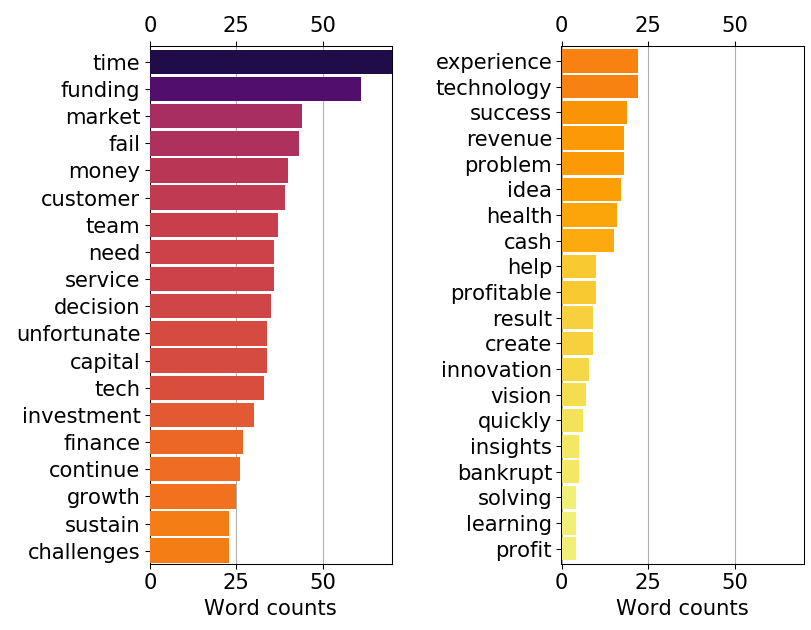

In [30]:
import matplotlib.gridspec as gridspec
% matplotlib notebook
# Set font and fontsize on plot
font = {'family': 'normal', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(9,7))
gs = gridspec.GridSpec(1, 2)
gs.update(bottom=0.15, left=0.175, right=0.94, wspace=0.7)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

# Set counts and words
y,x=[y[0] for y in wordlist], [x[1] for x in wordlist]
y_axis = np.arange(0, len(wordlist), 1)[::-1]
bars = ax1.barh(y_axis[:len(y_axis)/2], x[:len(x)/2], height=0.9, align='center',zorder=3)
# Format axis
ax1.set_yticks(y_axis)
ax1.set_yticklabels(y)
ax1.set_xlabel('Word counts')
ax1.xaxis.set_tick_params(labeltop='on', top='on')
ax1.set_ylim(bottom=19.5, top=38.6)
ax1.set_xlim(left=-0.1, right=70)
# Set colors of bars
radii = np.array(x[:len(x)/2])
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.inferno_r(r/80.))
    #bar.set_edgecolor(plt.cm.jet(r/80.))
    bar.set_alpha(1)
ax1.xaxis.grid(True,zorder=0)

# Plot second column
bars2 = ax2.barh(y_axis[len(y_axis)/2:], x[len(x)/2:], height=0.9, align='center',zorder=3)
ax2.set_yticks(y_axis)
ax2.set_yticklabels(y)
ax2.set_xlabel('Word counts')
ax2.set_ylim(bottom=-0.6, top=19.6)
ax2.set_xlim(left=-0.1, right=70)
ax2.xaxis.set_tick_params(labeltop='on', top='on')
ax2.xaxis.grid(True,zorder=0)
# Set colors of bars on 2nd column
radii = np.array(x[len(x)/2:])
for r, bar in zip(radii, bars2):
    bar.set_facecolor(plt.cm.inferno_r(r/80.))
    #bar.set_edgecolor(plt.cm.jet(r/80.))
    bar.set_alpha(1)
plt.subplots_adjust(top=0.93,bottom=0.13,left=0.0,right=0.93)
plt.savefig('WordCount_cartesian.jpg', dpi=600)
plt.show()


<IPython.core.display.Javascript object>


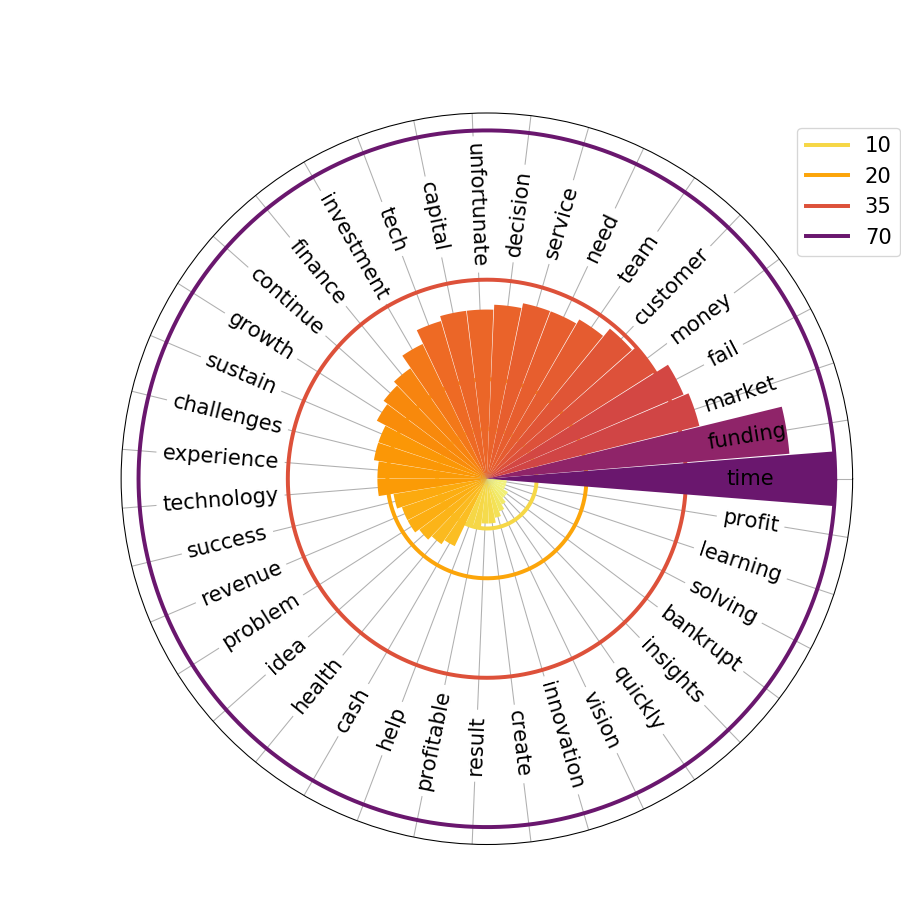

In [9]:
import numpy as np
import matplotlib.pyplot as plt

y,x=[y[0] for y in wordlist], [x[1] for x in wordlist]
N = len(x)
bottom = 0

# Define angles, radii and widths of bars
theta = np.linspace(0.0, 2 * np.pi-((2 * np.pi)/N), N, endpoint=True)
radii = np.array(x)
width = (2*np.pi) / (N+1)
fig3 = plt.figure(figsize=(10,10))
ax3 = plt.subplot(111, polar=True)
bars = ax3.bar(theta, radii, width=width, bottom=bottom,linewidth=3,zorder=3)

# Set the positions of the tick marks on a polar plot
ax3.set_rticks([])
ticks= np.linspace(0,360,N+1)[:-1] 
ax3.set_xticks(np.deg2rad(ticks)) # +(0.16534698/2.2)
ticklabels = y
ax3.set_xticklabels(ticklabels, fontsize=12)

# Rotate the angle of the text for better readability
plt.gcf().canvas.draw()
angles = np.linspace(0,2*np.pi,len(ax3.get_xticklabels())+1)
angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
angles = np.rad2deg(angles)
labels = []
counter=0
for label, angle in zip(ax3.get_xticklabels(), angles):
    x,y = label.get_position()
    # Set the position of text in plot
    if counter < 2: 
        lab = ax3.text(x,y+0.33, label.get_text(), transform=label.get_transform(),
                        ha=label.get_ha(), va=label.get_va(), fontsize=16,zorder=10)
    elif counter == 2: 
        lab = ax3.text(x,y+0.32, label.get_text(), transform=label.get_transform(),
                        ha=label.get_ha(), va=label.get_va(), fontsize=16,zorder=5)
    elif counter == 10: 
        lab = ax3.text(x,y+0.30, label.get_text(), transform=label.get_transform(),
                        ha=label.get_ha(), va=label.get_va(),backgroundcolor='white', fontsize=16)
    elif counter == N-3:
        lab = ax3.text(x,y+0.32, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va(), backgroundcolor='white', fontsize=16,zorder=4)
    else: 
        lab = ax3.text(x,y+0.32, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va(), backgroundcolor='white', fontsize=16,zorder=4)
    counter+=1
    lab.set_rotation(angle)
    labels.append(lab)
ax3.set_xticklabels([])
theta_2 = np.arange(1000)*2*np.pi/1000.
# Plot isolines for better readability of word counts on polar plot
ax3.plot(theta_2,10*np.ones(1000),color=plt.cm.inferno_r(10./100.), linewidth=3, label='10')
ax3.plot(theta_2,20*np.ones(1000),color=plt.cm.inferno_r(20./100.), linewidth=3, label='20')
ax3.plot(theta_2,40*np.ones(1000),color=plt.cm.inferno_r(40./100.), linewidth=3, label='35')
ax3.plot(theta_2,70*np.ones(1000),color=plt.cm.inferno_r(70./100.), linewidth=3, label='70')
# Use custom colors and opacity for bars
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.inferno_r(r/100.))

ax3.grid(zorder=0)
ax3.grid(True)

# Plot legend and adjust handles
legend = ax3.legend(fontsize=16, bbox_to_anchor=(0.91, 0.79))
for handle in legend.legendHandles:
    handle.set_linewidth(3.0)
#plt.savefig('WordCount_polar.jpg', dpi=600)
plt.show()

<IPython.core.display.Javascript object>


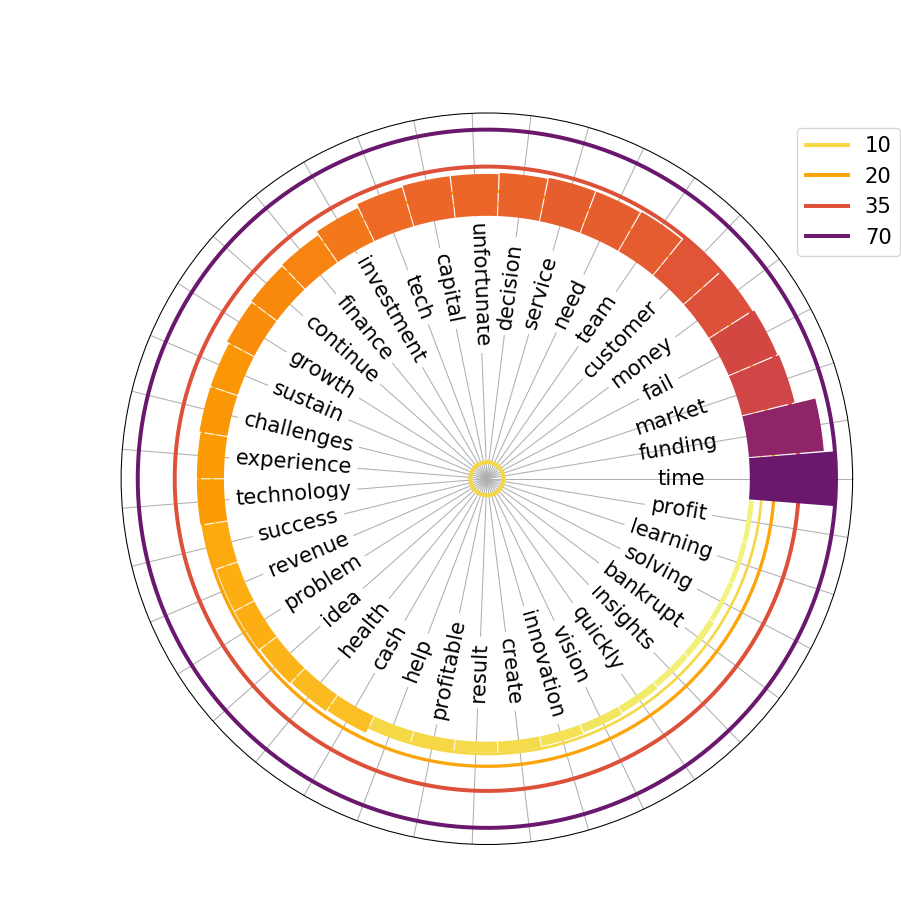

In [21]:
import numpy as np
import matplotlib.pyplot as plt

y,x=[y[0] for y in wordlist], [x[1] for x in wordlist]
N = len(x)
bottom = 210

# Define angles, radii and widths of bars
theta = np.linspace(0.0, 2 * np.pi-((2 * np.pi)/N), N, endpoint=True)
radii = np.array(x)
width = (2*np.pi) / (N+1)
fig3 = plt.figure(figsize=(10,10))
ax3 = plt.subplot(111, polar=True)
bars = ax3.bar(theta, radii, width=width, bottom=bottom,linewidth=3,zorder=3)

# Set the positions of the tick marks on a polar plot
ax3.set_rticks([])
ticks= np.linspace(0,360,N+1)[:-1] 
ax3.set_xticks(np.deg2rad(ticks)) #+(0.16534698/2.2))
ticklabels = y
ax3.set_xticklabels(ticklabels, fontsize=12)

# Rotate the angle of the text for better readability
plt.gcf().canvas.draw()
angles = np.linspace(0,2*np.pi,len(ax3.get_xticklabels())+1)
angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
angles = np.rad2deg(angles)
labels = []
counter=0
for label, angle in zip(ax3.get_xticklabels(), angles):
    x,y = label.get_position()
    # Set the position of text in plot
    if counter < 3: 
        lab = ax3.text(x,y+0.52, label.get_text(), transform=label.get_transform(),
                        ha=label.get_ha(), va=label.get_va(), fontsize=16,zorder=10)
    elif counter == 2: 
        lab = ax3.text(x,y+0.52, label.get_text(), transform=label.get_transform(),
                        ha=label.get_ha(), va=label.get_va(), fontsize=16,zorder=5)
    elif counter == 10: 
        lab = ax3.text(x,y+0.52, label.get_text(), transform=label.get_transform(),
                        ha=label.get_ha(), va=label.get_va(),backgroundcolor='white', fontsize=16)
    elif counter == N-3:
        lab = ax3.text(x,y+0.52, label.get_text(), transform=label.get_transform(),
                       ha=label.get_ha(), va=label.get_va(), backgroundcolor='white', fontsize=16,zorder=4)
    else: 
        lab = ax3.text(x,y+0.52, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va(), backgroundcolor='white', fontsize=16,zorder=4)
    counter+=1
    lab.set_rotation(angle)
    labels.append(lab)
ax3.set_xticklabels([])
theta_2 = np.arange(1000)*2*np.pi/1000.
ax3.plot(theta_2,10*np.ones(1000),color=plt.cm.inferno_r(10./100.), linewidth=3, label='')
# Plot isolines for better readability of word counts on polar plot
ax3.plot(theta_2,(210+10)*np.ones(1000),color=plt.cm.inferno_r(10./100.), linewidth=2, label='10')
ax3.plot(theta_2,(210+20)*np.ones(1000),color=plt.cm.inferno_r(20./100.), linewidth=2.5, label='20')
ax3.plot(theta_2,(210+40)*np.ones(1000),color=plt.cm.inferno_r(40./100.), linewidth=3, label='35')
ax3.plot(theta_2,(210+70)*np.ones(1000),color=plt.cm.inferno_r(70/100.), linewidth=3, label='70')
# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.inferno_r(r/100.))

ax3.grid(zorder=0)
ax3.grid(True)

# Plot legend and adjust handles
legend = ax3.legend(fontsize=16, bbox_to_anchor=(0.91, 0.79))
for handle in legend.legendHandles:
    handle.set_linewidth(3.0)
#plt.savefig('WordCount.jpg', dpi=400)
plt.show()